In [1]:
import numpy as np
import random
from pymoo.core.problem import Problem
from pymoo.problems import get_problem
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from src.multi_evolutive import RealMultiEvolutive
from src.evaluation import MultiObjectiveEvaluation

In [2]:
def plot_pareto_front(pareto_front, obtained_results, algorithm_name=str, problem_name=str):
    fig, axs = plt.subplots(1, 1)
    axs.set_ylim(-0.25, 1.25)
    axs.set_xlim(-0.25, 1.25)
    axs.scatter(pareto_front[:, 0], pareto_front[:, 1], label= problem_name + ' Pareto')
    axs.scatter(obtained_results[:, 0], obtained_results[:, 1], label= algorithm_name + ' Obtained Pareto')
    plt.legend()
    plt.show()

In [2]:
def plot_pareto_front_3d(pareto_front, obtained_results, algorithm_name=str, problem_name=str):
    fig = go.Figure()
    fig.add_trace(go.Scatter3d(x=pareto_front[:, 0], y=pareto_front[:, 1], z=[0]*pareto_front.shape[0], mode='markers', name=problem_name + ' Pareto'))
    fig.add_trace(go.Scatter3d(x=obtained_results[:, 0], y=obtained_results[:, 1], z=[0]*obtained_results.shape[0], mode='markers', name=algorithm_name + ' Obtained Pareto'))

    fig.show()

In [4]:
def plot_multiple_pareto_fronts(fronts_dict, title="Pareto Fronts Comparison", cmap='Dark2'):

    cmap = plt.get_cmap(cmap)
    
    plt.figure(figsize=(10, 6))
    
    n_fronts = len(fronts_dict)
    colors = [cmap(i / (n_fronts - 1) if n_fronts > 1 else 0) for i in range(n_fronts)]
    
    # Define a list of interesting markers
    markers = ['*',    # star
              'o',     # circle
              '^',     # triangle up
              's',     # square
              'D',     # diamond
              'v',     # triangle down
              'p',     # pentagon
              'h',     # hexagon
              '8',     # octagon
              'P']     # plus (filled)
    
    # Plot each front with a different color and marker
    for i, (front_name, points) in enumerate(fronts_dict.items()):
        marker_idx = i % len(markers)  # Cycle through markers if more fronts than markers
        plt.scatter(points[:, 0], 
                   points[:, 1],
                   c=[colors[i]], 
                   marker=markers[marker_idx],
                   s=50,  # Increased marker size for better visibility
                   label=front_name,
                   alpha=0.7)
    
    plt.title(title)
    plt.xlabel("Objective 1")
    plt.ylabel("Objective 2")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Adjust layout to prevent legend cutoff
    plt.tight_layout()
    plt.show()

### zdt1

Generation       50 | Population Elite Points:      399 | Zitlerd: 0.8576 | Spa: 0.0191 | Hrs: 0.8603 | Gdplus: 0.4068 | Igdplus: 0.3789 | Hv: 0.1897
Generation      100 | Population Elite Points:      742 | Zitlerd: 0.8471 | Spa: 0.0113 | Hrs: 0.8976 | Gdplus: 0.0523 | Igdplus: 0.0478 | Hv: 0.5859
Generation      150 | Population Elite Points:     1142 | Zitlerd: 0.9141 | Spa: 0.0084 | Hrs: 0.9020 | Gdplus: 0.0112 | Igdplus: 0.0102 | Hv: 0.6484
Generation      200 | Population Elite Points:     1716 | Zitlerd: 0.9892 | Spa: 0.0062 | Hrs: 0.9017 | Gdplus: 0.0045 | Igdplus: 0.0036 | Hv: 0.6598


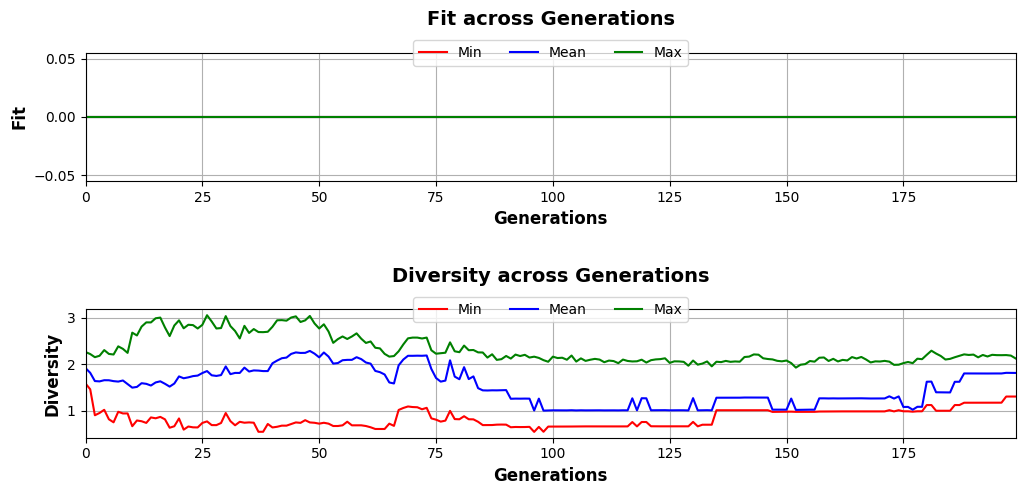

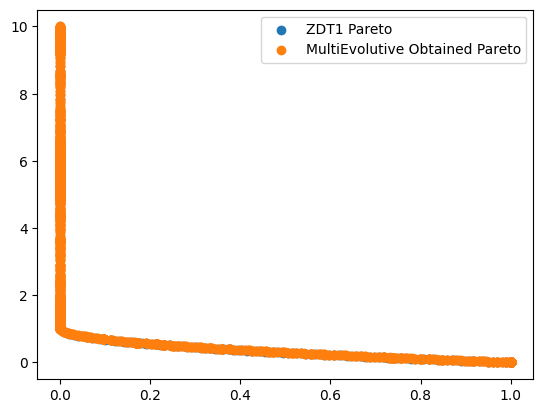

In [5]:
problem = get_problem("zdt1")
evaluation = MultiObjectiveEvaluation(
    evaluate=problem.evaluate,
    problem=problem,
    reference_point=(1., 1.),
    # limits=[[0, 1], [0, 1]]
)
evolutive = RealMultiEvolutive(
    n_individuals=50,
    value_range=[0, 1],
    maximize=[False, False],
    cromolength=30,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha"],
    front='front',
    penalization='crowding_norm',
    selection_pool_size=0.9,
    average_mutation_rate=1.25,
    mutation_eps=0.5,
    elitism=True,
    alpha=0.2,
    T_selection=6,
    evaluation_metrics=evaluation
)

results = evolutive.evolve(fit=problem.evaluate, n_generations=200, trace=50, obtain_metrics=True)
evolutive.plot_evolution_metrics(results["evolution_metrics"])
plt.show()

fit_scores = np.array([problem.evaluate(p) for p in results["best"]])
plot_pareto_front(problem.pareto_front(), fit_scores, 'MultiEvolutive', 'ZDT1')
# plot(problem.evaluate(results["best"]))


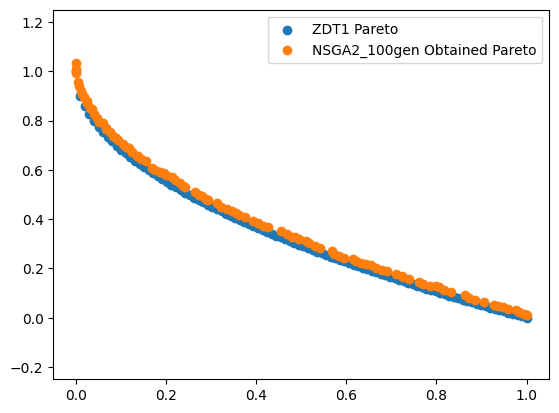

In [ ]:
algorithm = NSGA2(pop_size=100)
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False)

pareto_front = problem.pareto_front()
obtained_results = res.F

plot_pareto_front(pareto_front, obtained_results, 'NSGA2_100gen', 'ZDT1')

In [9]:
plot_pareto_front_3d(pareto_front, obtained_results, 'NSGA2_100gen', 'ZDT1')

### zdt3

Generation       50 | Population Elite Points:      511 | Best Fit: 1.0943 | Mean Fit: 0.0127
Generation      100 | Population Elite Points:      984 | Best Fit: 1.0488 | Mean Fit: 0.0064
Generation      150 | Population Elite Points:     1468 | Best Fit: 1.0252 | Mean Fit: 0.0042
Generation      200 | Population Elite Points:     1935 | Best Fit: 1.0272 | Mean Fit: 0.0032


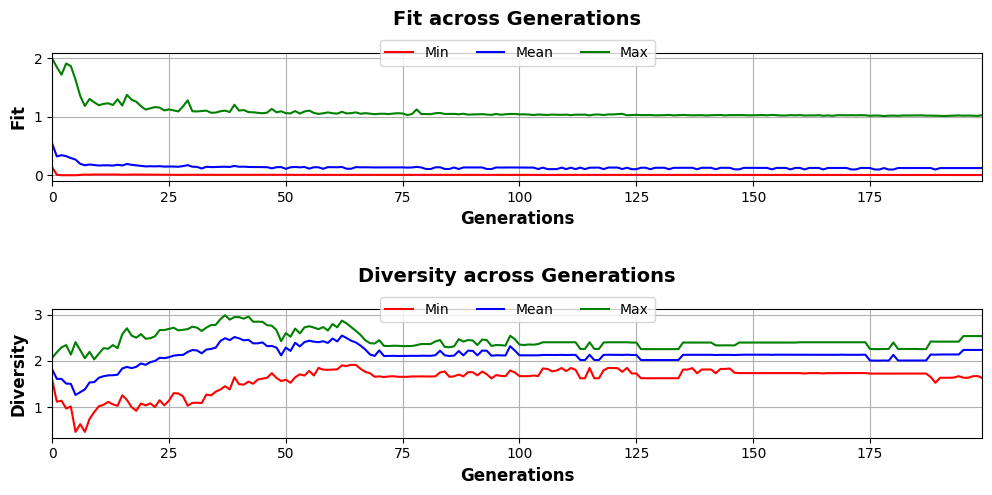

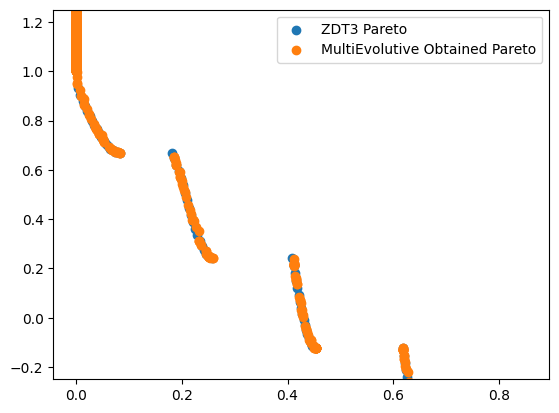

In [10]:
problem = get_problem("zdt3")
evolutive = RealMultiEvolutive(
    n_individuals=50,
    value_range=[0, 1],
    maximize=[False, False],
    cromolength=30,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha"],
    front='front',
    penalization='crowding_norm',
    selection_pool_size=0.8,
    average_mutation_rate=1.5,
    mutation_eps=0.5,
    elitism=True,
    alpha=0.6,
    T_selection=10
)

results = evolutive.evolve(fit=problem.evaluate, n_generations=200, trace=50, obtain_metrics=True)
evolutive.plot_evolution_metrics(results["evolution_metrics"])
plt.show()

fit_scores = np.array([problem.evaluate(p) for p in results["best"]])
plot_pareto_front(problem.pareto_front(), fit_scores, 'MultiEvolutive', 'ZDT3')


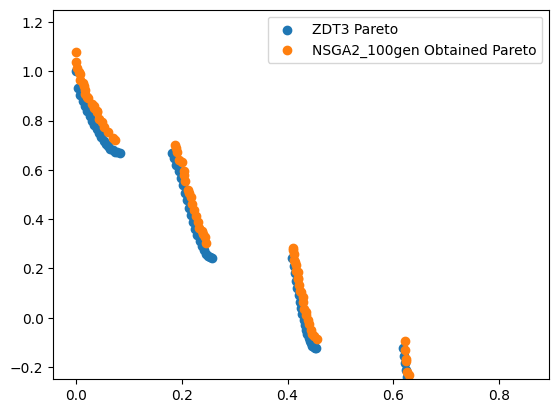

In [ ]:
algorithm = NSGA2(pop_size=100)
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False)

pareto_front = problem.pareto_front()
obtained_results = res.F

plot_pareto_front(pareto_front, obtained_results, 'NSGA2_100gen', 'ZDT3')

In [12]:
plot_pareto_front_3d(pareto_front, obtained_results, 'NSGA2_100gen', 'ZDT3')

### mw7

In [17]:
def mw7(x):
    g = 1 + 9 * np.sum(x[1:]) / (len(x) - 1)
    f1 = x[0]
    f2 = g * (1 - (f1 / g)**0.5)
    c1 = np.sum(x) - 1.5
    c2 = 0.5 - np.sum(x[:-1])
    return [f1, f2], [c1, c2]

In [14]:
def penalized_mw7(x):
    """
    Wrapper function for MW7 that incorporates constraints using penalty method.
    Returns modified fitness values with penalties for constraint violations.
    """
    # Get original objectives and constraints
    [f1, f2], [c1, c2] = mw7(x)
    
    # Calculate constraint violations
    # c1: sum(x) - 1.5 <= 0
    # c2: 0.5 - sum(x[:-1]) <= 0

    scaled_c1 = c1 / 1.5  # Normalize c1 by its max value
    scaled_c2 = c2 / 0.5  # Normalize c2 by its max value

    violation1 = max(0, scaled_c1) # Only penalize if > 0
    violation2 = max(0, scaled_c2) # Only penalize if > 0
    
    # Penalty coefficient (you may need to tune this)
    penalty_coef = 10 * np.max([abs(f1), abs(f2)])
    penalty = penalty_coef * (violation1 + violation2)

    # Add penalties to objectives
    penalized_f1 = f1 + penalty
    penalized_f2 = f2 + penalty
    
    return np.array([penalized_f1, penalized_f2])

In [7]:
import numpy as np
a = np.random.random(( 100, 15))

In [8]:
from examples.multiobj_utils import penalized_fit
from pymoo.problems import get_problem
import numpy as np

problem = get_problem("mw7")
print(problem.evaluate(a))
# print(mw7(a))
mw7_pen = penalized_fit(problem.evaluate, maximize=[False, False], restrictions=[('greq', 0), ('lteq', 0)])
print(mw7_pen(a))

(array([[2.02368276e+00, 5.37884116e+00],
       [3.79651612e+00, 6.80094180e+00],
       [1.91133055e-01, 5.09642270e+00],
       [2.14238413e+00, 8.66522268e+00],
       [5.61106555e+00, 3.26427993e+00],
       [2.96804406e+00, 6.41526148e+00],
       [6.25264348e+00, 8.81235690e+00],
       [3.23659600e+00, 3.27413376e+00],
       [2.11646160e+00, 1.15882079e+01],
       [5.17581543e+00, 3.91966321e+00],
       [3.16141475e+00, 8.24093676e+00],
       [2.84489296e+00, 6.64240333e+00],
       [5.71164364e+00, 9.46477865e+00],
       [4.81794677e+00, 8.02072408e+00],
       [9.29088390e+00, 4.72855529e+00],
       [8.31443252e+00, 6.75734859e+00],
       [8.27980498e-02, 5.66922229e+00],
       [4.66553165e+00, 5.09270386e+00],
       [4.23671716e+00, 6.82426087e+00],
       [4.28727055e+00, 6.80589578e+00],
       [2.37389069e+00, 6.41397400e+00],
       [1.47937477e+00, 7.97112235e+00],
       [6.03848333e+00, 4.88965369e+00],
       [4.95259239e+00, 6.74710155e+00],
       [6.23466

Generation       50 | Population Elite Points:     1102 | Zitlerd: 0.8387 | Spa: 0.0259 | Hrs: 0.6531 | Gdplus: 0.1086 | Igdplus: 0.3557 | Hv: 2.7612
Generation      100 | Population Elite Points:     2021 | Zitlerd: 0.8014 | Spa: 0.0113 | Hrs: 0.6574 | Gdplus: 0.1084 | Igdplus: 0.3367 | Hv: 2.7906
Generation      150 | Population Elite Points:     2736 | Zitlerd: 0.8317 | Spa: 0.0084 | Hrs: 0.6566 | Gdplus: 0.0987 | Igdplus: 0.3332 | Hv: 2.7986
Generation      200 | Population Elite Points:     3536 | Zitlerd: 0.8637 | Spa: 0.0065 | Hrs: 0.6565 | Gdplus: 0.0944 | Igdplus: 0.3309 | Hv: 2.8049


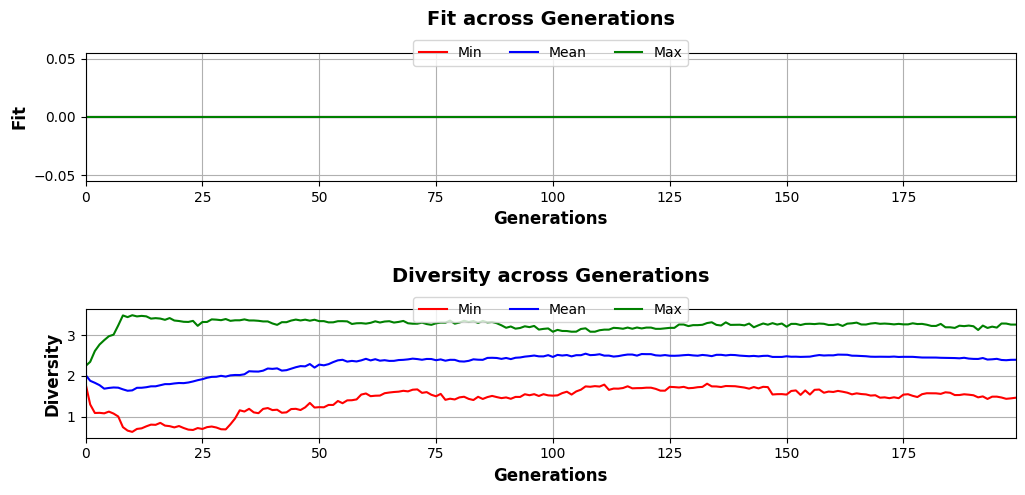

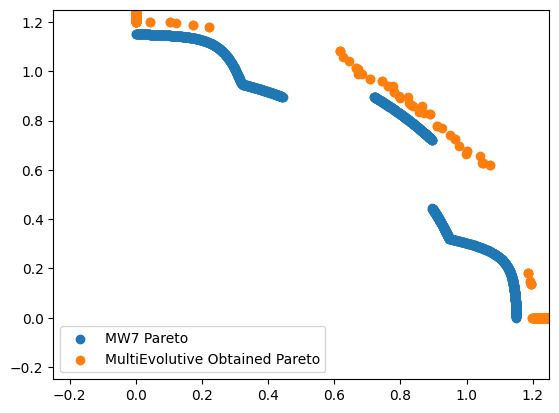

In [ ]:
from src.multi_evolutive import RealMultiEvolutive
from examples.multiobj_utils import penalized_fit
from pymoo.problems import get_problem
from src.evaluation import MultiObjectiveEvaluation
import matplotlib.pyplot as plt
import numpy as np
problem = get_problem("mw7")
mw7_pen = penalized_fit(problem.evaluate, maximize=[False, False], restrictions=[('lteq', 0), ('lteq', 0)], epsilon=100.)
evaluation = MultiObjectiveEvaluation(
    evaluate=problem.evaluate,
    problem=problem,
    reference_point=(2., 2.),
    # limits=[[0, 1], [0, 1]]
)
evolutive = RealMultiEvolutive(
    n_individuals=50,
    value_range=[0, 1],
    maximize=[False, False],
    cromolength=15,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha"],
    front='front',
    penalization='crowding_norm',
    selection_pool="best",
    selection_pool_size=1.,
    average_mutation_rate=1.25,
    mutation_eps=0.5,
    elitism=True,
    alpha=0.,
    T_selection=6,
    fit_penalization=[(0., 1.25), (0., 1.25)],
    evaluation_metrics=evaluation
)

results = evolutive.evolve(fit=mw7_pen, n_generations=200, trace=50, obtain_metrics=True)

evolutive.plot_evolution_metrics(results["evolution_metrics"])
plt.show()


pareto_front = problem.pareto_front()
obtained_results = np.array([problem.evaluate(p)[0] for p in results["best"]])
# obtained_results = np.array([mw7(p)[0] for p in results["best"]])  # Use only objectives, not constraints

plot_pareto_front(pareto_front, obtained_results, 'MultiEvolutive', 'MW7')

Generation       50 | Population Elite Points:       86 | Zitlerd: 0.9723 | Spa: 0.0253 | Hrs: 0.1403 | Gdplus: 0.0333 | Igdplus: 0.0648 | Hv: 2.9316
Generation      100 | Population Elite Points:      265 | Zitlerd: 1.4262 | Spa: 0.0244 | Hrs: 0.1428 | Gdplus: 0.0231 | Igdplus: 0.0588 | Hv: 2.9817
Generation      150 | Population Elite Points:      564 | Zitlerd: 1.6140 | Spa: 0.0078 | Hrs: 0.1389 | Gdplus: 0.0229 | Igdplus: 0.0496 | Hv: 3.0120
Generation      200 | Population Elite Points:      845 | Zitlerd: 1.6954 | Spa: 0.0070 | Hrs: 0.1380 | Gdplus: 0.0221 | Igdplus: 0.0394 | Hv: 3.0148


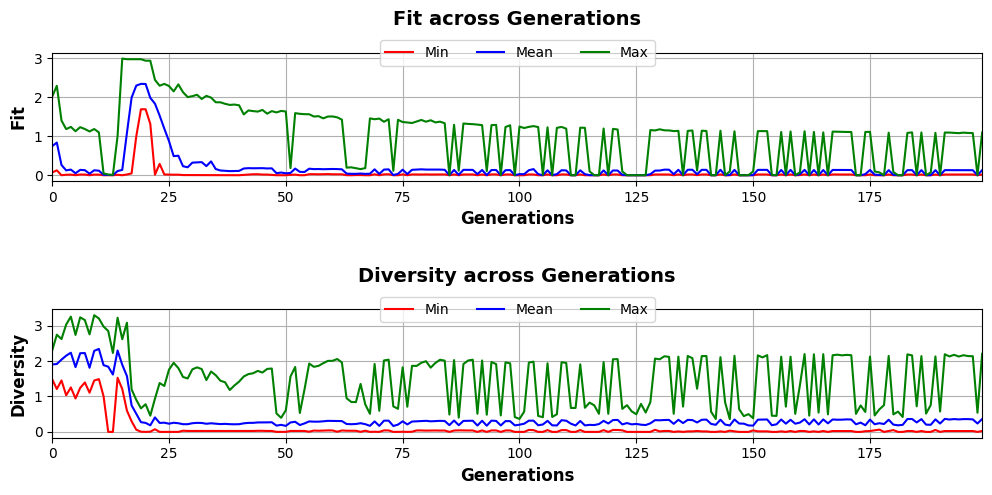

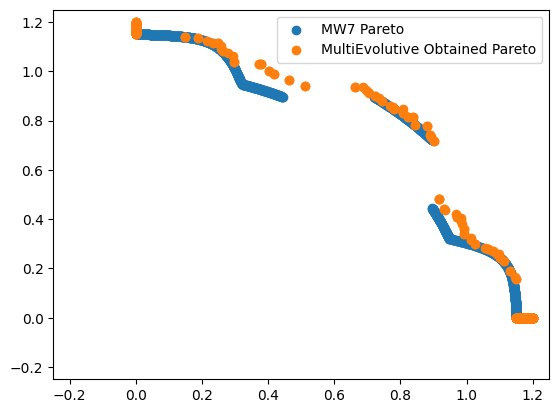

In [18]:
from src.multi_evolutive import RealMultiEvolutive
from examples.multiobj_utils import penalized_fit
from pymoo.problems import get_problem
from src.evaluation import MultiObjectiveEvaluation
import matplotlib.pyplot as plt
import numpy as np
problem = get_problem("mw7")
# mw7_pen = penalized_fit(problem.evaluate, maximize=[False, False], restrictions=[('greq', 0), ('lteq', 0)], epsilon=100.)
evaluation = MultiObjectiveEvaluation(
    evaluate=problem.evaluate,
    problem=problem,
    reference_point=(2., 2.),
    # limits=[[0, 1], [0, 1]]
)
evolutive = RealMultiEvolutive(
    n_individuals=50,
    value_range=[0, 1],
    maximize=[False, False],
    restrictions=[('lteq', 0), ('lteq', 0)],
    cromolength=15,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha"],
    selection_pool=["best", "section"],
    front='front',
    penalization='crowding_norm',
    selection_pool_size=0.9,
    average_mutation_rate=1.25,
    mutation_eps=0.75,
    elitism=True,
    alpha=0.8,
    T_selection=8,
    evaluation_metrics=evaluation
)

results = evolutive.evolve(fit=problem.evaluate, n_generations=200, trace=50, obtain_metrics=True)

evolutive.plot_evolution_metrics(results["evolution_metrics"])
plt.show()


pareto_front = problem.pareto_front()
obtained_results = np.array([problem.evaluate(p)[0] for p in results["best"]])
# obtained_results = np.array([mw7(p)[0] for p in results["best"]])  # Use only objectives, not constraints

plot_pareto_front(pareto_front, obtained_results, 'MultiEvolutive', 'MW7')

In [3]:
from src.multi_evolutive import RealMultiEvolutive
from examples.multiobj_utils import penalized_fit
from pymoo.problems import get_problem
from src.evaluation import MultiObjectiveEvaluation
import matplotlib.pyplot as plt
import numpy as np
problem = get_problem("mw7")
def mw7(points: np.ndarray):
    fit_score, pen = problem.evaluate(points)
    if pen[0] >= 0:
        pen[0] = 0
    if pen[1] <= 0:
        pen[1] = 0
    return np.concatenate([fit_score, pen])

mw7_pen = penalized_fit(problem.evaluate, maximize=[False, False], restrictions=[('lteq', 0), ('lteq', 0)], epsilon=100.)
evaluation = MultiObjectiveEvaluation(
    evaluate=problem.evaluate,
    problem=problem,
    reference_point=(2., 2., 0., 0.),
    # limits=[[0, 1], [0, 1]]
)
evolutive = RealMultiEvolutive(
    n_individuals=100,
    value_range=[0, 1],
    maximize=[False, False, True, False],
    cromolength=15,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha"],
    front='front',
    penalization='crowding_norm',
    selection_pool="best",
    selection_pool_size=0.6,
    average_mutation_rate=1.25,
    mutation_eps=0.5,
    elitism=True,
    alpha=0.,
    T_selection=6,
    # fit_penalization=[(0., 1.25), (0., 1.25)],
    # evaluation_metrics=evaluation
)

results = evolutive.evolve(fit=mw7, n_generations=100, trace=50, obtain_metrics=True)

evolutive.plot_evolution_metrics(results["evolution_metrics"])
plt.show()


pareto_front = problem.pareto_front()
obtained_results = np.array([problem.evaluate(p)[0] for p in results["best"]])
# obtained_results = np.array([mw7(p)[0] for p in results["best"]])  # Use only objectives, not constraints

plot_pareto_front(pareto_front, obtained_results, 'MultiEvolutive', 'MW7')

Generation       50 | Population Elite Points:     4811 | Best Fit: 1.0004 | Mean Fit: 0.0012


KeyboardInterrupt: 

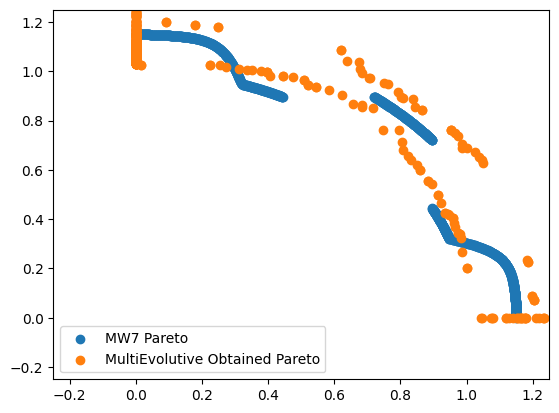

In [5]:
plot_pareto_front(pareto_front, obtained_results, 'MultiEvolutive', 'MW7')


In [17]:
algorithm = NSGA2(pop_size=100)
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False)

pareto_front = problem.pareto_front()
obtained_results = res.F

plot_pareto_front(pareto_front, obtained_results, 'NSGA2_100gen', 'MW7')

NameError: name 'NSGA2' is not defined

In [22]:
plot_pareto_front_3d(pareto_front, obtained_results, 'NSGA2_100gen', 'MW7')

### mw14

In [23]:
problem = get_problem("mw14", n_var=30, n_obj=3)
evolutive = RealMultiEvolutive(
    n_individuals=50,
    value_range=[0, 1.5],
    maximize=[False, False],
    cromolength=30,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha"],
    front='front',
    penalization='crowding_norm',
    selection_pool_size=0.8,
    average_mutation_rate=1.5,
    mutation_eps=0.5,
    elitism=True,
    alpha=0.6,
    T_selection=10
)

results = evolutive.evolve(fit=problem.evaluate, n_generations=200, trace=50, obtain_metrics=True)
evolutive.plot_evolution_metrics(results["evolution_metrics"])
plt.show()

fit_scores = np.array([problem.evaluate(p) for p in results["best"]])
plot_pareto_front(problem.pareto_front(), fit_scores, 'MultiEvolutive', 'MW14')


c:\Users\aleja\Desktop\MAADM\BIO\bioinspired-evo\src\multi_evolutive\evolutive.py:74: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [24]:
algorithm = NSGA2(pop_size=100)
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False)

pareto_front = problem.pareto_front()
obtained_results = res.F

plot_pareto_front_3d(pareto_front, obtained_results, 'NSGA2_100gen', 'MW14')

### TSP

In [54]:
class TSPProblem(Problem):
    def __init__(self, n_cities, seed=50):
        # Define the number of variables (cities) and objectives (time and distance)
        super().__init__(n_var=n_cities, n_obj=2, n_constr=0, xl=0, xu=1)
        
        # Initialize the random seed for reproducibility
        if seed is not None:
            np.random.seed(seed)
        
        # Generate random distances and times between cities
        self.distances = np.random.uniform(0, 100, size=(n_cities, n_cities))
        self.distances = (self.distances + self.distances.T) / 2
        self.times = np.random.uniform(0, 300, size=(n_cities, n_cities))
        random.seed(None)
        
        # Ensure the diagonal is zero (distance/time from a city to itself is zero)
        np.fill_diagonal(self.distances, 0)
        np.fill_diagonal(self.times, 0)

    def _evaluate(self, x, out, *args, **kwargs):
        # Calculate the total distance and time for each solution in x
        distances = []
        times = []
        
        for route in x:
            perm = np.argsort(route)
            total_distance = 0
            total_time = 0
            
            for i in range(len(perm) - 1):
                total_distance += self.distances[perm[i], perm[i+1]]
                total_time += self.times[perm[i], perm[i+1]]
            
            # Add distance and time from last city back to the first city
            total_distance += self.distances[perm[-1], perm[0]]
            total_time += self.times[perm[-1], perm[0]]
            
            distances.append(total_distance)
            times.append(total_time)
        
        out["F"] = np.column_stack([distances, times])

In [55]:
problem_tsp = TSPProblem(100)

In [56]:
algorithm = NSGA2(pop_size=100)
res = minimize(problem_tsp,
               algorithm,
               ('n_gen', 10),
               verbose=False)
res2 = minimize(problem_tsp,
               algorithm,
               ('n_gen', 1000),
               verbose=False)

results = {}

results["NSGA2_10gen"] = res.F
results["NSGA2_1000gen"] = res2.F

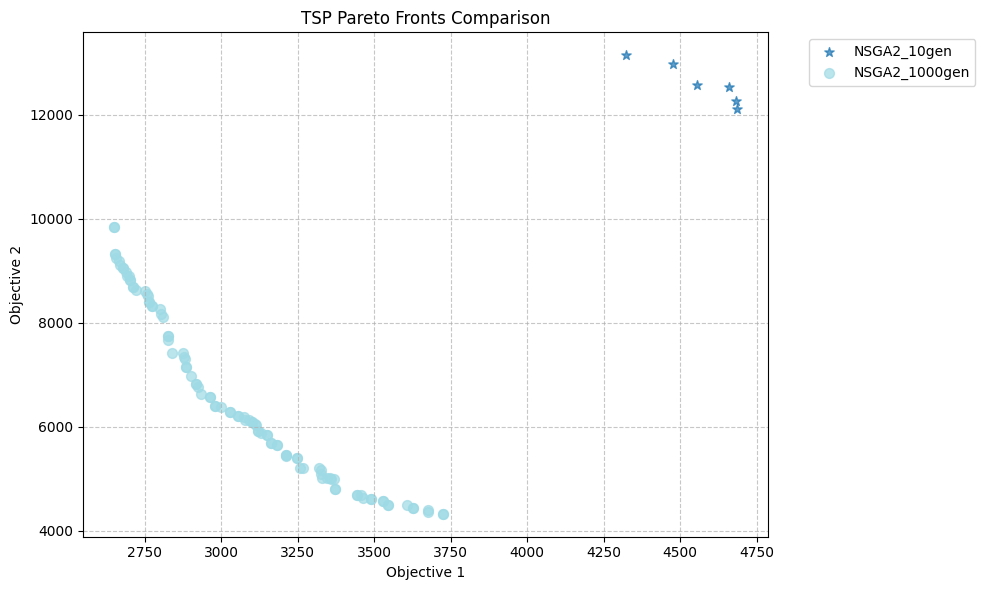

In [57]:
plot_multiple_pareto_fronts(results, title="TSP Pareto Fronts Comparison", cmap='tab20')

Generation       50 | Population Elite Points:       35 | Best Fit: 1.7897 | Mean Fit: 0.2052
Generation      100 | Population Elite Points:       34 | Best Fit: 1.8745 | Mean Fit: 0.2204
Generation      150 | Population Elite Points:       40 | Best Fit: 1.7472 | Mean Fit: 0.2150
Generation      200 | Population Elite Points:       35 | Best Fit: 1.9423 | Mean Fit: 0.2128


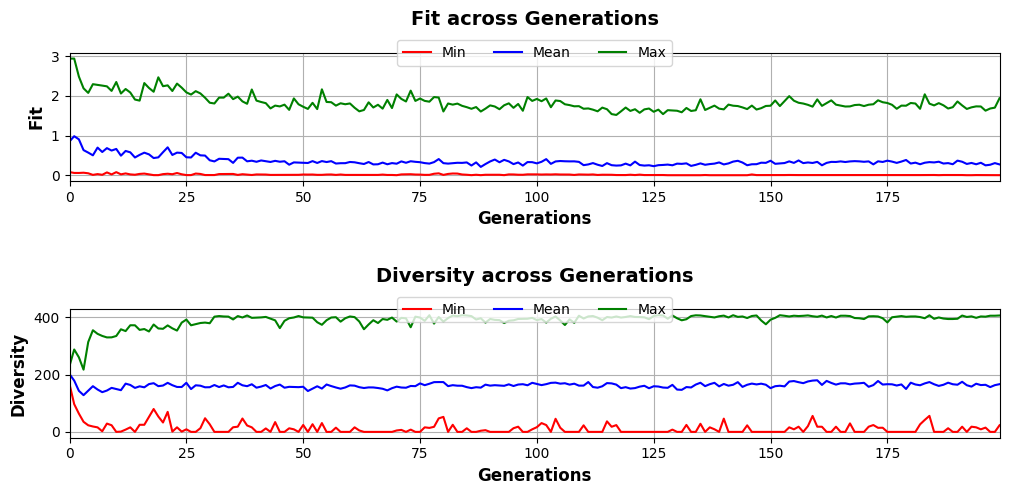

In [58]:
from src.multi_evolutive import PermutationMultiEvolutive
import matplotlib.pyplot as plt

evolutive = PermutationMultiEvolutive(
    alphabet=range(100),
    n_individuals=50,
    cromolength=100,
    mutation=["to-opt", "insert-gene", "swap-gene"],
    crossover= ["uniform", "split-merge"],
    front='front',
    penalization='crowding_norm',
    selection_pool=['best', 'section'],
	T_selection=20,
	p_crossover=0.7,
	average_mutation_rate=1.25,
    maximize=[False, False],
    selection_pool_size=1.5,
	elitism=True
)

results = evolutive.evolve(fit=problem_tsp.evaluate, n_generations=200, trace=50, obtain_metrics=True)
evolutive.plot_evolution_metrics(results["evolution_metrics"])
plt.show()


Generation       50 | Population Elite Points:       27 | Best Fit: 2.0467 | Mean Fit: 0.3253
Generation      100 | Population Elite Points:       34 | Best Fit: 1.8523 | Mean Fit: 0.2614
Generation      150 | Population Elite Points:       42 | Best Fit: 1.6356 | Mean Fit: 0.1562
Generation      200 | Population Elite Points:       76 | Best Fit: 1.4074 | Mean Fit: 0.0749


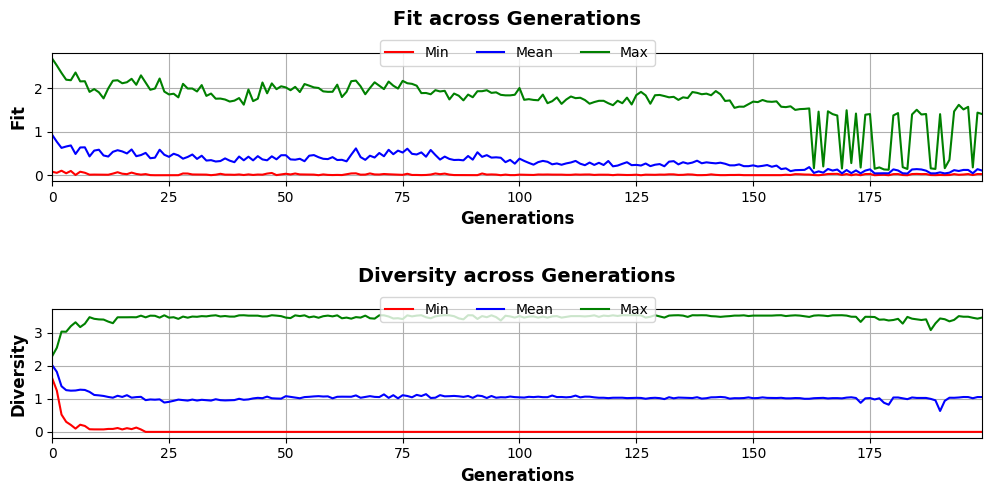

In [ ]:
evolutive = RealMultiEvolutive(
    n_individuals=50,
    value_range=[0, 1],
    maximize=[False, False],
    cromolength=100,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha", "split-merge"],
    front='front',
    penalization='crowding_norm',
    selection_pool=['best', 'section'], # , ('best', 4)],
    selection_pool_size=1.,
    average_mutation_rate=1.,
    mutation_eps=.5,
    elitism=True,
    alpha=0.6,
    T_selection=10
)

results = evolutive.evolve(fit=problem_tsp.evaluate, n_generations=200, trace=50, obtain_metrics=True)
evolutive.plot_evolution_metrics(results["evolution_metrics"])
plt.show()